In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import scipy
%matplotlib inline

Data was downloaded from https://crcns.org/data-sets/hc/hc-2/about-hc-2 LFP was resampled at 1250 Hz.

In [3]:
path='/home/maria/Documents/NeuralDataAnalysis/ec013.527.eeg'
data = np.fromfile(path, dtype='int16')
print(data.shape[0]/20000/60/4)

8.558098958333334


There were 4 shanks and 31 channels in the recordings in this file. The data is arranged so that each time point loops over the channels. We therefore extract the data for one channel through numpy indexing.

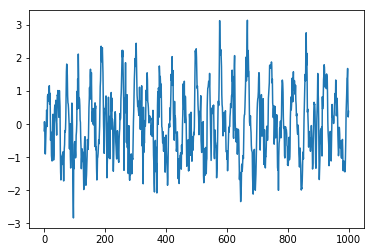

In [4]:
one_channel=data[0::(31*4)][0:1000]
one_channel=(one_channel-np.mean(one_channel))/(np.std(one_channel))
second_channel=data[1::(31*4)][0:1000]
plt.plot(range(0,one_channel.shape[0]),one_channel)

4164345.2640679157


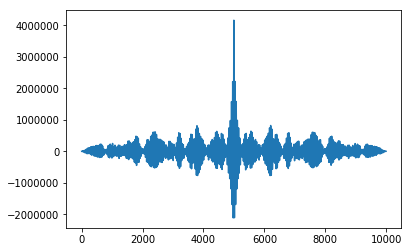

In [60]:
corr=correlate(one_channel,second_channel)
plt.plot(range(0,corr.shape[0]),corr)
print(np.max(corr))

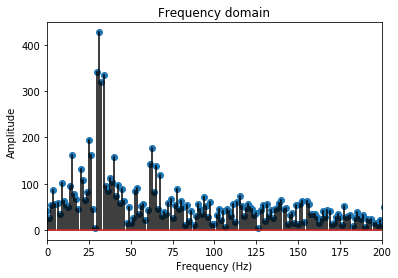

In [5]:
npnts=len(second_channel)
srate=1250
signalX = scipy.fftpack.fft(second_channel)
signalAmp = 2*np.abs(signalX)/npnts

# vector of frequencies in Hz
hz = np.linspace(0,srate/2,int(np.floor(npnts/2)+1))

plt.stem(hz,signalAmp[0:len(hz)],'k')
plt.xlim([0,200])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency domain')
plt.show()